In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip iccad4_modified.zip

Streaming output truncated to the last 5000 lines.
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD4424.png3.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD4424.png3.png  
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD4189.png7.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD4189.png7.png  
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD41469.png6.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD41469.png6.png  
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD4932.png6.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD4932.png6.png  
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD43547.png1.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD43547.png1.png  
  inflating: iccad4_modified/validation/test_NHS/NNHSCAD42621.png3.png  
  inflating: __MACOSX/iccad4_modified/validation/test_NHS/._NNHSCAD42621.png3.png  
  inflating: 

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [19]:
folder = 'iccad4_modified'

In [20]:
base_dir = os.path.join(os.path.dirname(folder), 'iccad4_modified')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# directory with our training hotspot pictures
train_hotspot_dir = os.path.join(train_dir, 'Hotspot')  

# directory with our training non-hotspot pictures
train_not_hotspot_dir = os.path.join(train_dir, 'Not_Hotspot')  

# directory with our validation hotspot pictures
validation_hotspot_dir = os.path.join(validation_dir, 'test_HS')

 # directory with our non-hotspot pictures
validation_not_hotspot_dir = os.path.join(validation_dir, 'test_NHS')

In [21]:
num_hs_tr = len(os.listdir(train_hotspot_dir))
num_nhs_tr = len(os.listdir(train_not_hotspot_dir))

num_hs_val = len(os.listdir(validation_hotspot_dir))
num_nhs_val = len(os.listdir(validation_not_hotspot_dir))

total_train = num_hs_tr + num_nhs_tr
total_val = num_hs_val + num_nhs_val

print('The dataset contains:')
print('\u2022 {:,} training images'.format(total_train))
print('\u2022 {:,} validation images'.format(total_val))

print('\nThe training set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_tr))
print('\u2022 {:,} images without hotspot'.format(num_nhs_tr))

print('\nThe validation set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_val))
print('\u2022 {:,} images without hotspot'.format(num_nhs_val))

The dataset contains:
• 4,549 training images
• 32,069 validation images

The training set contains:
• 96 images with hotspot
• 4,453 images without hotspot

The validation set contains:
• 178 images with hotspot
• 31,891 images without hotspot


Found 4547 images belonging to 2 classes.


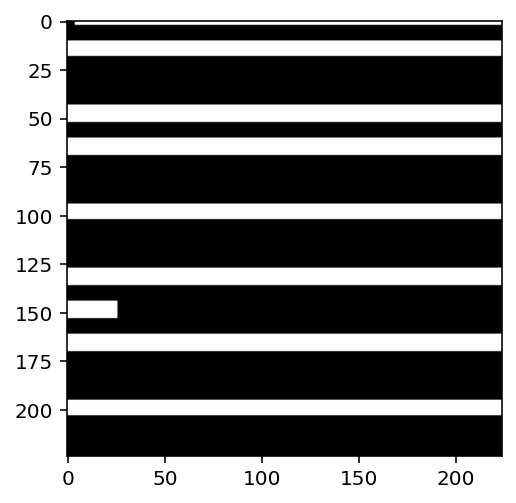

In [22]:
BATCH_SIZE = 64
IMG_SHAPE  = 224

image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                          class_mode='binary')

plt.imshow(train_data_gen[0][0][0])
plt.show()

Found 32067 images belonging to 2 classes.


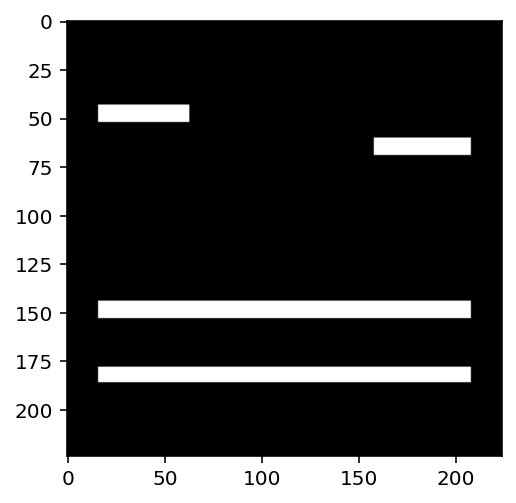

In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(directory=validation_dir,
                                                 batch_size=BATCH_SIZE,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')
plt.imshow(val_data_gen[0][0][0])
plt.show()

In [24]:
layer_neurons = [2048, 1024, 512, 256, 128, 56, 28, 14]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (IMG_SHAPE, IMG_SHAPE, 3)))

for neurons in layer_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
            
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              308283392 
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)              

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
EPOCHS = 5

history = model.fit_generator(train_data_gen,
                              epochs=EPOCHS,
                              validation_data=val_data_gen)

Epoch 1/5
72/72 [==============================] - 179s 2s/step - loss: 5.9950 - accuracy: 0.7656 - val_loss: 0.1588 - val_accuracy: 0.9945
Epoch 2/5
72/72 [==============================] - 179s 2s/step - loss: 1.0433 - accuracy: 0.8636 - val_loss: 0.1224 - val_accuracy: 0.9945
Epoch 3/5
72/72 [==============================] - 179s 2s/step - loss: 0.6048 - accuracy: 0.9127 - val_loss: 0.1058 - val_accuracy: 0.9945
Epoch 4/5
72/72 [==============================] - 173s 2s/step - loss: 0.4996 - accuracy: 0.9428 - val_loss: 0.1377 - val_accuracy: 0.9945
Epoch 5/5
72/72 [==============================] - 172s 2s/step - loss: 0.3717 - accuracy: 0.9580 - val_loss: 0.1083 - val_accuracy: 0.9945


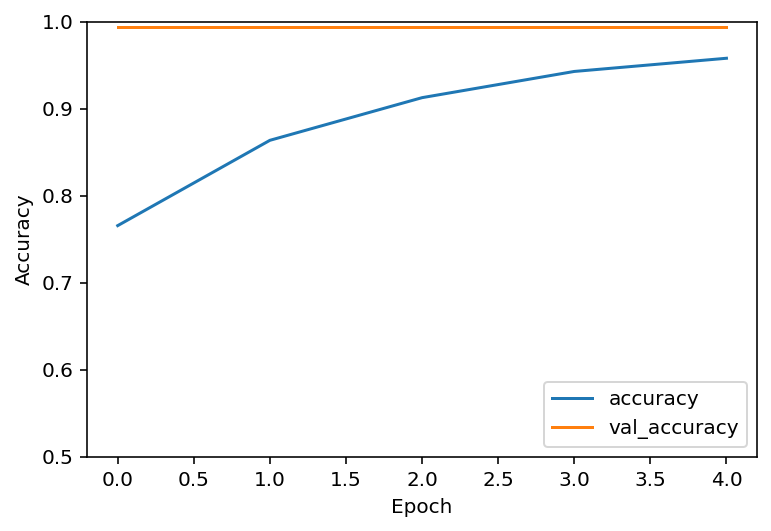

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')